# Load Libraries and Dataset

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
# Dataset Source: https://www.kaggle.com/datasets/agungpambudi/trends-product-coffee-shop-sales-revenue-dataset/data
df = pd.read_csv("<DATASET_PATH", delimiter='|')

# Dataset Analysis

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


* Dataset does not contain NaN values
* There are 5 numeric feature & 6 object features

In [6]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,149116.0,74737.371872,43153.600016,1.0,37335.75,74727.5,112094.25,149456.0
transaction_qty,149116.0,1.438276,0.542509,1.0,1.00,1.0,2.00,8.0
store_id,149116.0,5.342063,2.074241,3.0,3.00,5.0,8.00,8.0
product_id,149116.0,47.918607,17.930020,1.0,33.00,47.0,60.00,87.0
unit_price,149116.0,3.382219,2.658723,0.8,2.50,3.0,3.75,45.0


In [7]:
df.shape

(149116, 11)

In [8]:
df.isnull().sum() # To be sure about NaNs

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [9]:
# Check Duplicates
df.duplicated().sum()

0

* There are no duplicate rows

In [10]:
# Check columns name
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [11]:
# Check categorical features unique values
categorical_features = ['store_location', 'product_category', 'product_type', 'product_detail']
for cat in categorical_features:
  print(f"{cat} Unique Values:")
  print(df[cat].unique())
  print(f"\n{cat}'s Total Unique Values {df[cat].nunique()}")
  print("*" * 30)

store_location Unique Values:
['Lower Manhattan' "Hell's Kitchen" 'Astoria']

store_location's Total Unique Values 3
******************************
product_category Unique Values:
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']

product_category's Total Unique Values 9
******************************
product_type Unique Values:
['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar free syrup' 'Drinking Chocolate' 'Premium Beans'
 'Chai tea' 'Green beans' 'Espresso Beans' 'Green tea' 'Organic Chocolate'
 'Housewares' 'Black tea' 'House blend Beans' 'Clothing']

product_type's Total Unique Values 29
******************************
product_detail Unique Values:
['Ethiopia Rg' 'Spicy 

# Preprocessing and Data Cleaning

### Convert `transaction_time` and `transaction_date` to datetime

In [12]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

### Extract `day`, `month`, `year` and `hour` of transaction - Feature Engineering

In [13]:
df['transaction_day'] = df['transaction_date'].dt.day # extract day
df['transacation_month'] = df['transaction_date'].dt.month # extract month
df['transacation_year'] = df['transaction_date'].dt.year # extract year

df['transacation_hour'] = df['transaction_time'].dt.hour # Extract hour of transaction

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      149116 non-null  int64         
 1   transaction_date    149116 non-null  datetime64[ns]
 2   transaction_time    149116 non-null  datetime64[ns]
 3   transaction_qty     149116 non-null  int64         
 4   store_id            149116 non-null  int64         
 5   store_location      149116 non-null  object        
 6   product_id          149116 non-null  int64         
 7   unit_price          149116 non-null  float64       
 8   product_category    149116 non-null  object        
 9   product_type        149116 non-null  object        
 10  product_detail      149116 non-null  object        
 11  transaction_day     149116 non-null  int64         
 12  transacation_month  149116 non-null  int64         
 13  transacation_year   149116 no

In [15]:
# drop "transaction_time"
df.drop(columns=['transaction_time', 'transaction_time'], inplace=True)

In [16]:
df.head()

,transaction_id,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_day,transacation_month,transacation_year,transacation_hour
0,1,2023-01-01,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,2023,7
1,2,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,2023,7
2,3,2023-01-01,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,1,2023,7
3,4,2023-01-01,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,1,2023,7
4,5,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,2023,7


### Add `total_sales`

In [17]:
df['total_sales'] = df['transaction_qty'] * df['unit_price']
df.head()

,transaction_id,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_day,transacation_month,transacation_year,transacation_hour,total_sales
0,1,2023-01-01,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,1,2023,7,6.0
1,2,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,2023,7,6.2
2,3,2023-01-01,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,1,2023,7,9.0
3,4,2023-01-01,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,1,2023,7,2.0
4,5,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,1,2023,7,6.2


# Exploratory Data Analysis

### Count of Products Per Category

<ipython-input-18-3162c186e4a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='product_category', palette='Set1')


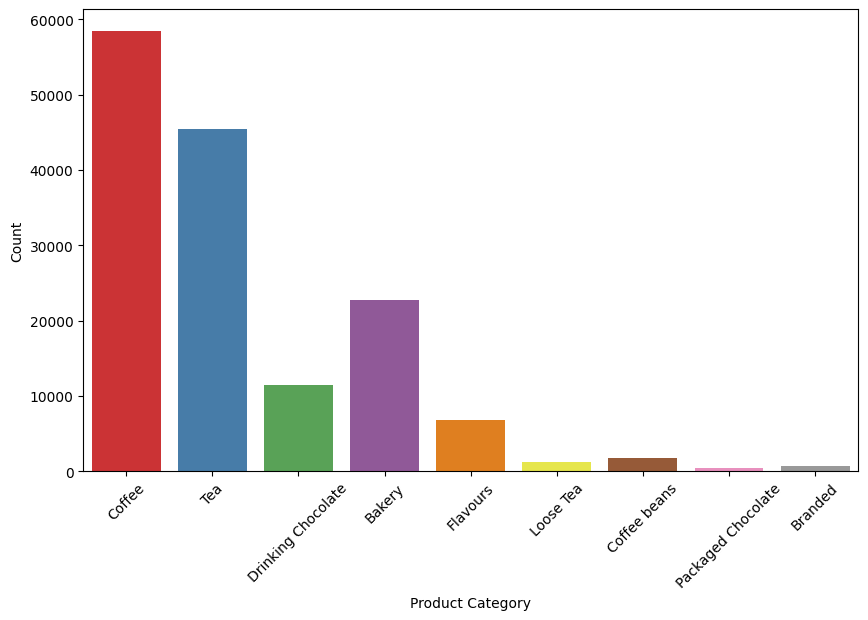

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product_category', palette='Set1')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Best Seller - Products

In [19]:
products_top10 = df['product_type'].value_counts().head(10)
products_top10

Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: product_type, dtype: int64

<ipython-input-20-7dcece215af9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products_top10.index, y=products_top10, palette='Set1')


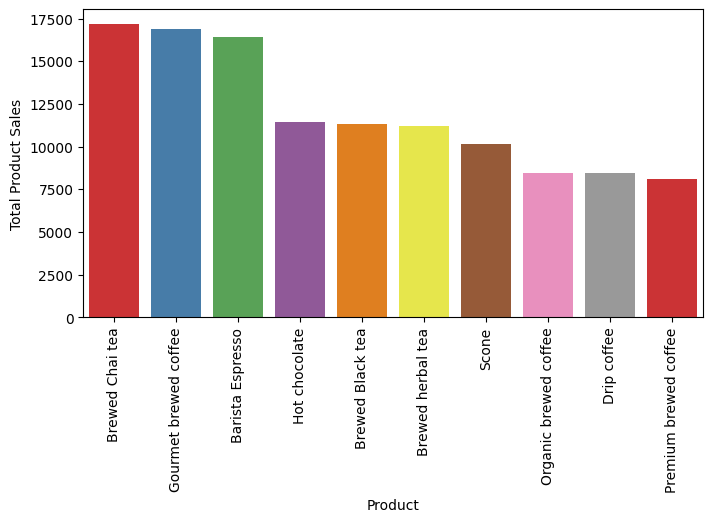

In [20]:
plt.figure(figsize=(8, 4))
sns.barplot(x=products_top10.index, y=products_top10, palette='Set1')
plt.xlabel("Product")
plt.ylabel("Total Product Sales")
plt.xticks(rotation=90)
plt.show()

### Best Seller - Category

In [21]:
category_top5 = df['product_category'].value_counts().sort_values(ascending=False).head(5)
category_top5

Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Name: product_category, dtype: int64

<ipython-input-22-3698ea245485>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_top5.index, y=category_top5, palette='Set1')


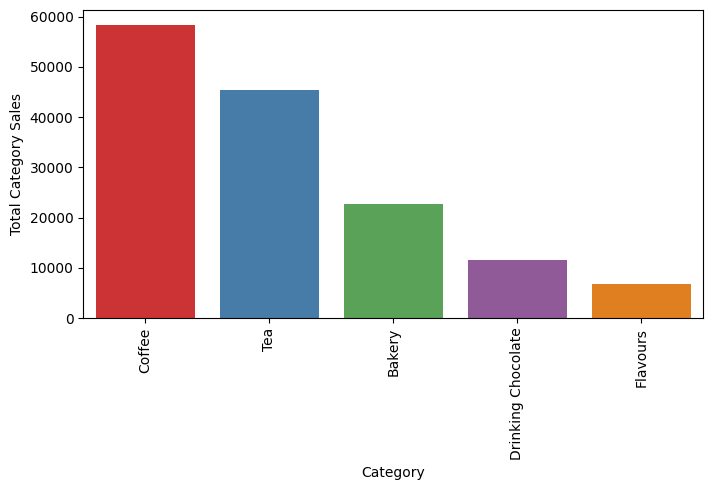

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(x=category_top5.index, y=category_top5, palette='Set1')
plt.xlabel("Category")
plt.ylabel("Total Category Sales")
plt.xticks(rotation=90)
plt.show()

### Top Expensive Products

In [23]:
top_expensive_products = df.groupby('product_type')['unit_price'].max().sort_values(ascending=False).reset_index().head(10)
top_expensive_products

,product_type,unit_price
0,Premium Beans,45.00
1,Organic Beans,28.00
2,Clothing,28.00
3,Housewares,23.00
4,Gourmet Beans,21.00
5,Espresso Beans,20.45
6,House blend Beans,18.00
7,Drinking Chocolate,13.33
8,Chai tea,10.95
9,Green beans,10.00


<ipython-input-24-8717cb0f7daa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_expensive_products, x='product_type', y='unit_price', palette='Set1')


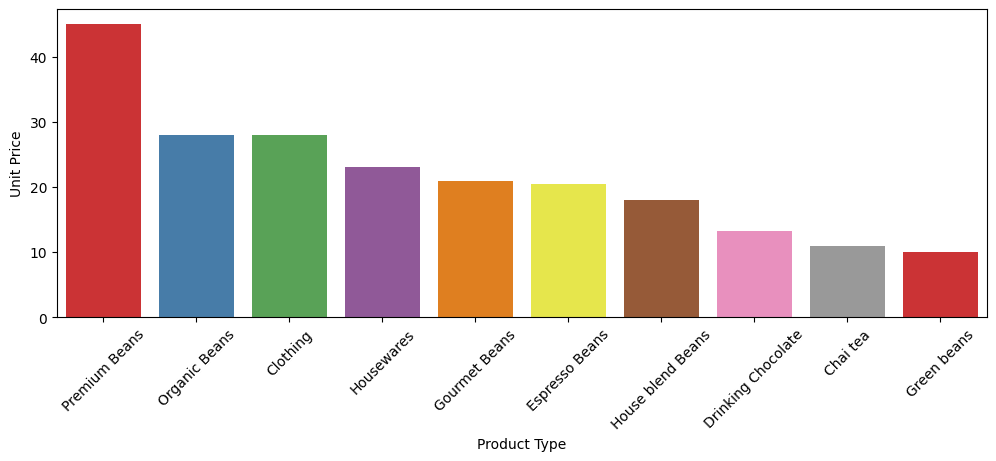

In [24]:
plt.figure(figsize=(12, 4))
sns.barplot(data=top_expensive_products, x='product_type', y='unit_price', palette='Set1')
plt.xlabel("Product Type")
plt.ylabel("Unit Price")
plt.xticks(rotation=45)
plt.show()

### Total Sales Per Store

<ipython-input-25-5b1de1e99515>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='store_location', y='total_sales', estimator=sum, palette='Set1')


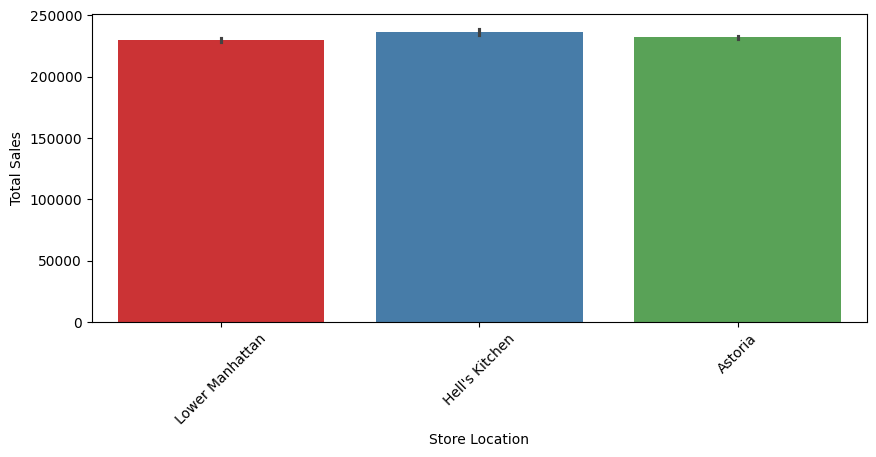

In [25]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='store_location', y='total_sales', estimator=sum, palette='Set1')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#### Pie Chart Of Transaction's Count Per Store

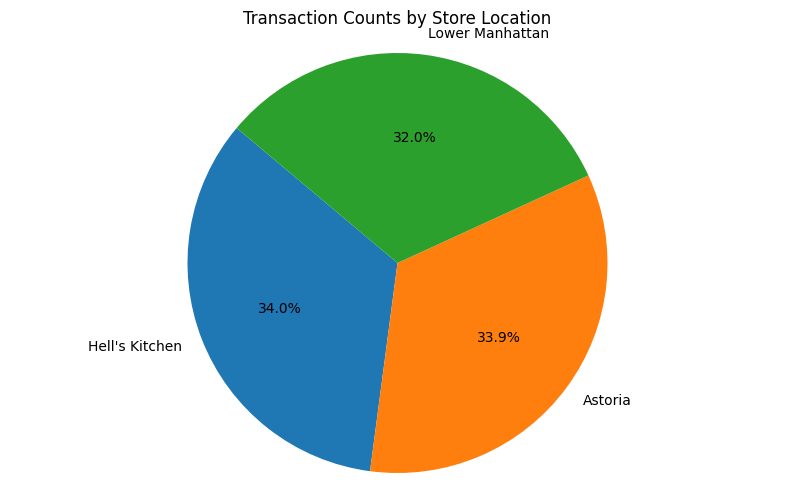

In [26]:
plt.figure(figsize=(10, 6))
store_location_counts = df['store_location'].value_counts()
plt.pie(store_location_counts, labels=store_location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transaction Counts by Store Location')
plt.axis('equal')
plt.show()

### Total Sales Average Per Day & Month

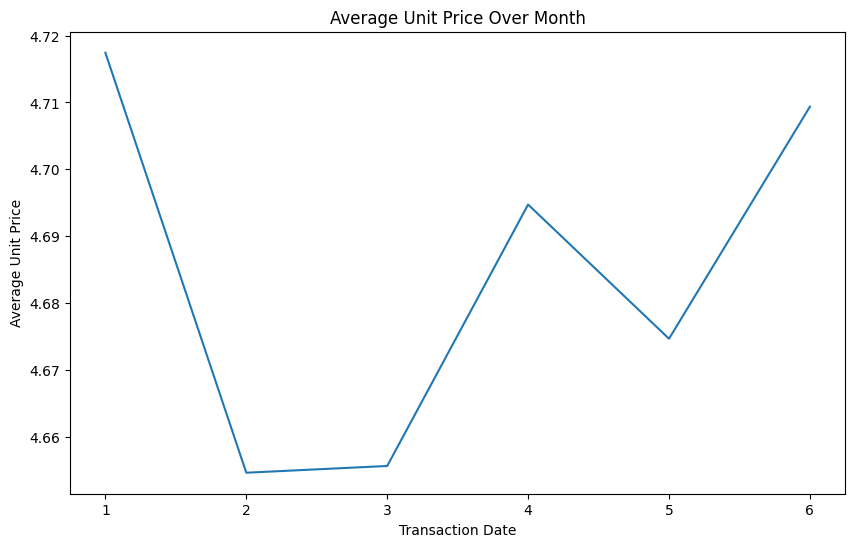

In [27]:
plt.figure(figsize=(10, 6))
df.groupby('transacation_month')['total_sales'].mean().plot()
plt.title('Average Unit Price Over Month')
plt.xlabel('Transaction Date')
plt.ylabel('Average Unit Price')
plt.show()

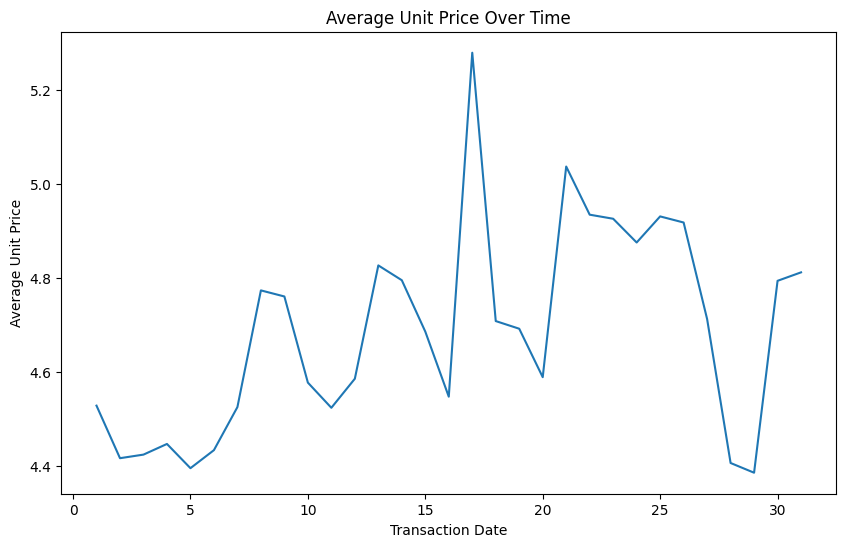

In [28]:
plt.figure(figsize=(10, 6))
df.groupby('transaction_day')['total_sales'].mean().plot()
plt.title('Average Unit Price Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Average Unit Price')
plt.show()

### Total Sales per `transacion_day`

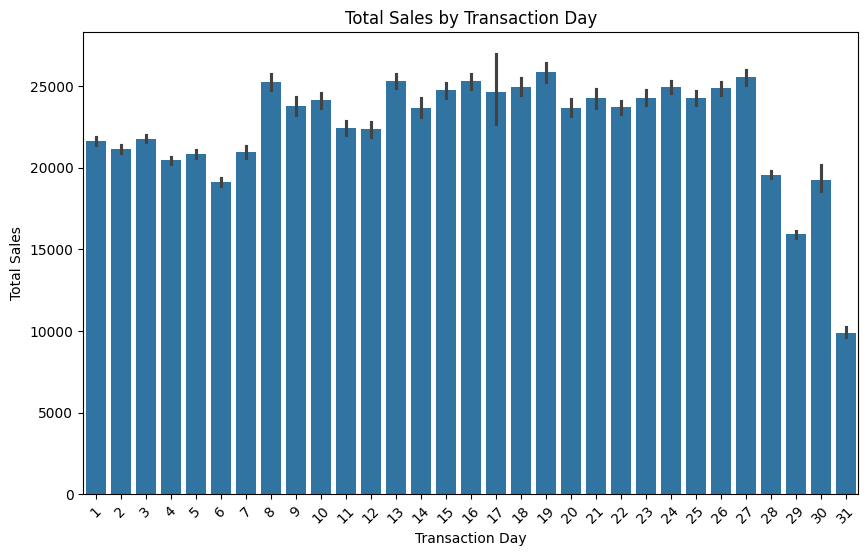

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='transaction_day', y='total_sales', estimator=sum)
plt.title('Total Sales by Transaction Day')
plt.xlabel('Transaction Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Total Sales Per Category

In [30]:
sales_per_category = df.groupby('product_category')['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
sales_per_category

,product_category,total_sales
0,Coffee,269952.45
1,Tea,196405.95
2,Bakery,82315.64
3,Drinking Chocolate,72416.00
4,Coffee beans,40085.25
5,Branded,13607.00
6,Loose Tea,11213.60
7,Flavours,8408.80
8,Packaged Chocolate,4407.64


<ipython-input-31-963c3ebe79fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_category, x='product_category', y='total_sales', palette='Set1')


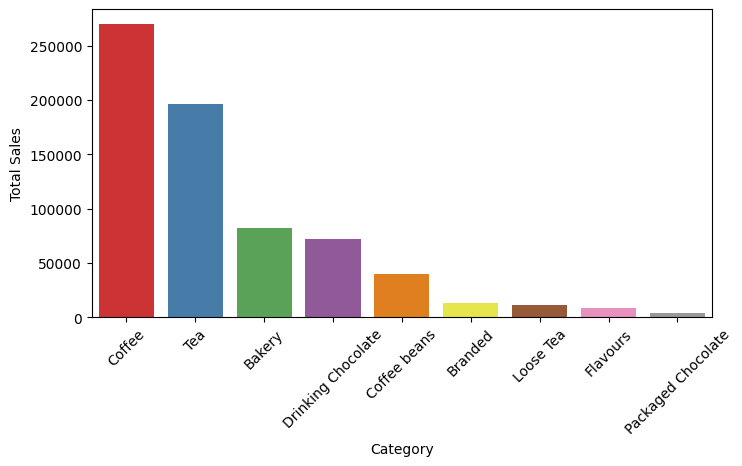

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(data=sales_per_category, x='product_category', y='total_sales', palette='Set1')
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### Total Sales by `store_location` & `product_category`

In [32]:
sales_cate_loc = df.groupby(['store_location', 'product_category'])['total_sales'].agg('sum').sort_values(ascending=False).reset_index()
sales_cate_loc

,store_location,product_category,total_sales
0,Hell's Kitchen,Coffee,91222.65
1,Astoria,Coffee,89744.30
2,Lower Manhattan,Coffee,88985.50
3,Astoria,Tea,67839.90
4,Hell's Kitchen,Tea,64701.30
5,Lower Manhattan,Tea,63864.75
6,Lower Manhattan,Bakery,28328.94
7,Hell's Kitchen,Bakery,27386.95
8,Astoria,Bakery,26599.75
9,Astoria,Drinking Chocolate,26335.25


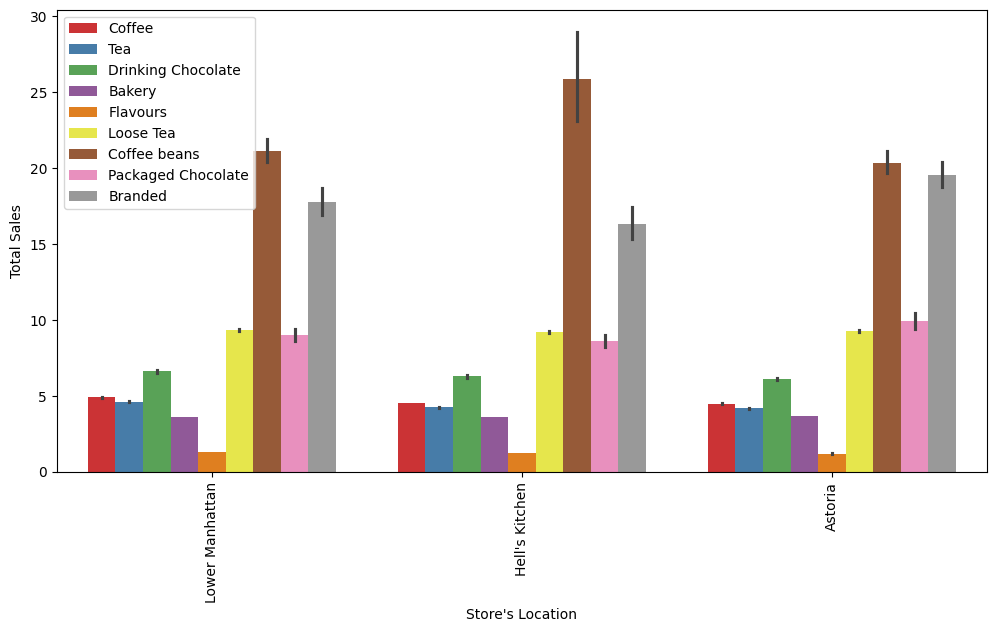

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='store_location', y='total_sales', hue='product_category', palette='Set1')
plt.xlabel("Store's Location")
plt.ylabel("Total Sales")
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Total Sales Per `store_location` & `month`

In [34]:
sales_store_month = df.groupby(['store_location', 'transacation_month'])['total_sales'].agg('sum').reset_index().sort_values(by='store_location')
sales_store_month

,store_location,transacation_month,total_sales
0,Astoria,1,27313.66
1,Astoria,2,25105.34
2,Astoria,3,32835.43
3,Astoria,4,39477.61
4,Astoria,5,52428.76
5,Astoria,6,55083.11
11,Hell's Kitchen,6,56957.08
10,Hell's Kitchen,5,52598.93
9,Hell's Kitchen,4,40304.14
8,Hell's Kitchen,3,33110.57


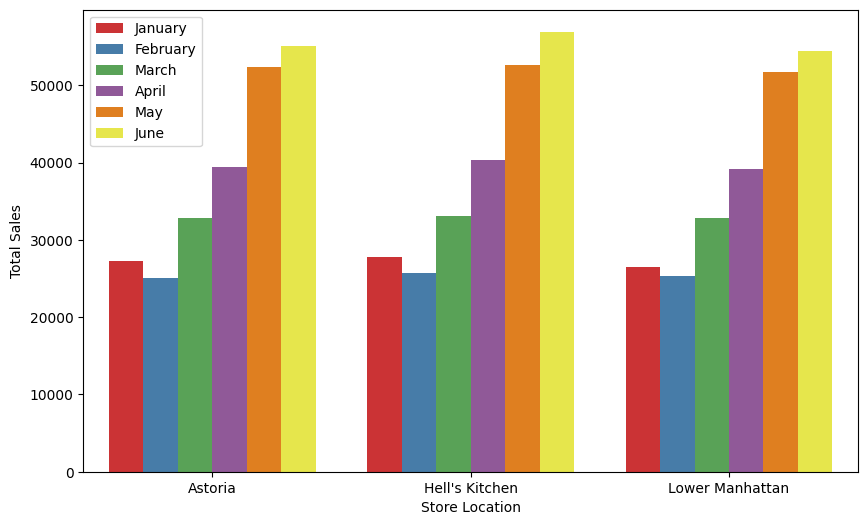

In [35]:
month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_store_month, x='store_location', y='total_sales', hue=sales_store_month['transacation_month'].map(month_labels), palette="Set1")
plt.xlabel("Store Location")
plt.ylabel("Total Sales")
plt.legend(fontsize=10)
plt.show()

### Sales Per day

In [36]:
sales_per_day = df.groupby(['transacation_month', 'transaction_day'])['total_sales'].agg('sum').reset_index()

sales_per_day

,transacation_month,transaction_day,total_sales
0,1,1,2508.20
1,1,2,2403.35
2,1,3,2565.00
3,1,4,2220.10
4,1,5,2418.85
...,...,...,...
176,6,26,5875.90
177,6,27,5975.65
178,6,28,4728.90
179,6,29,4450.75


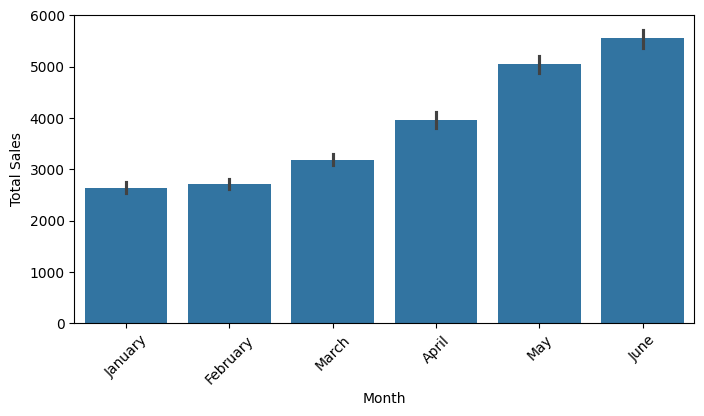

In [37]:
# Define the mapping of month numbers to month names
month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Plot the barplot with month names on the x-axis
plt.figure(figsize=(8, 4))
sns.barplot(x=sales_per_day['transacation_month'].map(month_labels), y='total_sales', data=sales_per_day)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

#### Lineplot of Sales Per Month

<ipython-input-38-dfbb39a48c96>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df['transaction_date'], y=df['total_sales'], data=df, palette='Set1')


<function matplotlib.pyplot.show(close=None, block=None)>

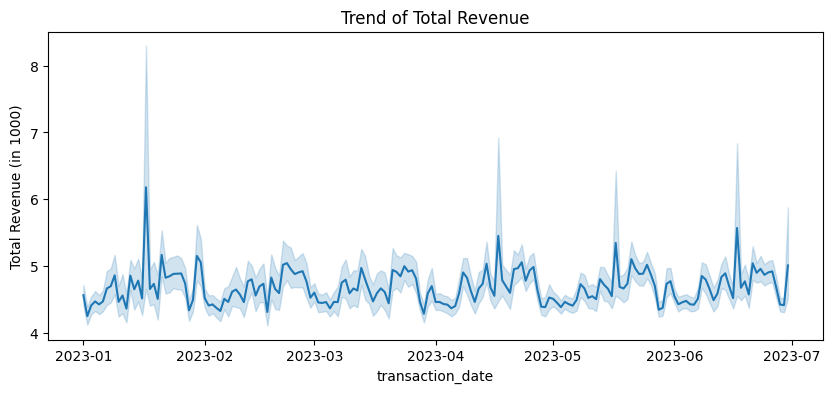

In [38]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=df['transaction_date'], y=df['total_sales'], data=df, palette='Set1')
plt.title("Trend of Total Revenue")
plt.ylabel("Total Revenue (in 1000)")
plt.show

### Total Orders Per `product_category`

In [39]:
orders_per_cate = df.groupby('product_category')['transaction_id'].nunique().sort_values(ascending=False)
orders_per_cate

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: transaction_id, dtype: int64

<ipython-input-40-8ab77225ddf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_per_cate.index, y=orders_per_cate, palette='Set1')


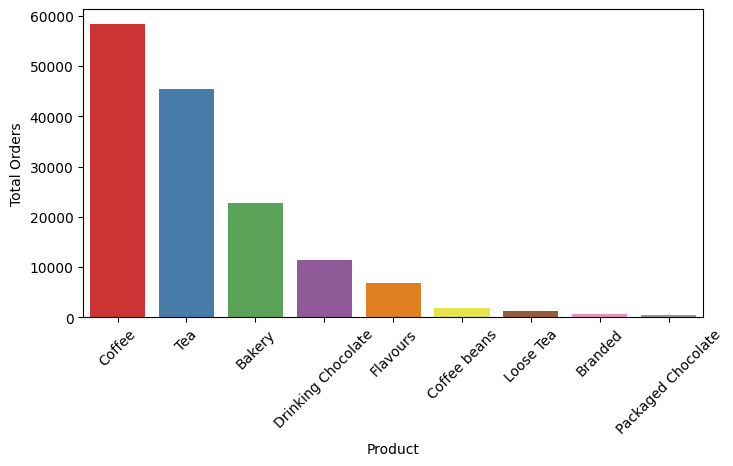

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(x=orders_per_cate.index, y=orders_per_cate, palette='Set1')
plt.xlabel("Product")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

### Generate WordCloud From `product_details`

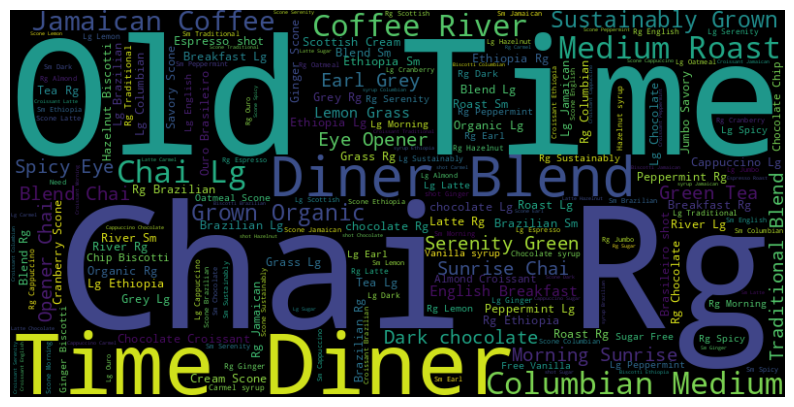

In [41]:
from wordcloud import WordCloud
text = ' '.join(df['product_detail'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400 ,background_color='black').generate(text)

# Plot the word cloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()